In [13]:
ABS_DIR = "/N/project/simsom/simsom_v3/10172023_v3.0"

In [3]:
import simsom.config_vals as configs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import pandas as pd
import os
import glob
import json

In [14]:
from simsom.utils import *
import glob 
RES_DIR = os.path.join(ABS_DIR, "results_verbose", "vary_phigamma_5runs")
fpaths = glob.glob(f"{RES_DIR}/00*.json.gz")
fpaths

['/N/project/simsom/simsom_v3/10172023_v3.0/results_verbose/vary_phigamma_5runs/00_3.json.gz',
 '/N/project/simsom/simsom_v3/10172023_v3.0/results_verbose/vary_phigamma_5runs/00_4.json.gz',
 '/N/project/simsom/simsom_v3/10172023_v3.0/results_verbose/vary_phigamma_5runs/00_2.json.gz',
 '/N/project/simsom/simsom_v3/10172023_v3.0/results_verbose/vary_phigamma_5runs/00_1.json.gz',
 '/N/project/simsom/simsom_v3/10172023_v3.0/results_verbose/vary_phigamma_5runs/00.json.gz']

## Varying phi

## Phi=0

In [6]:
verbose = read_json_compressed('/N/project/simsom/simsom_v3/10172023_v3.0/results_verbose/vary_phigamma_5runs/00_3.json.gz')
verbose.keys()

dict_keys(['phi', 'verbose', 'output_cascades', 'epsilon', 'rho', 'mu', 'alpha', 'theta', 'graph_gml', 'n_threads', 'quality', 'diversity', 'discriminative_pow', 'quality_timestep', 'all_messages', 'all_feeds'])

In [15]:
verbose['phi']

0.0

In [7]:
import pandas as pd

messages = pd.DataFrame.from_records(verbose["all_messages"])
messages.head()

,id,is_by_bot,phi,quality,engagement,agent_id,human_shares,bot_shares,spread_via_agents,seen_by_agents,infeed_of_agents,qual_th,share_th
0,1,0.0,0.0,0.013071,0.013071,72474,1,0,[72474],[],[],1529,1529
1,2,0.0,0.0,0.046836,0.046836,62054,1,0,[62054],[],[],2916,2916
2,3,0.0,0.0,0.149509,0.149509,99500,1,0,[99500],[],[],6677,6677
3,4,0.0,0.0,0.241750,0.241750,110275,1,0,[110275],[],[],9739,9739
4,5,0.0,0.0,0.316050,0.316050,25889,1,0,[25889],[],[],12024,12024


In [9]:
# sanity check
no_human = len(messages[messages.is_by_bot==0])
no_bot = len(messages[messages.is_by_bot==1])
print(f"Number of messages by humans and bots: {no_human}, {no_bot}")
print(f"Ratio of bot/human messages: {np.round(no_bot/no_human, 4)}")

Number of messages by humans and bots: 20817, 1008
Ratio of bot/human messages: 0.0484


In [11]:
human_e = messages[messages.is_by_bot==0]['engagement'].values
bot_e = messages[messages.is_by_bot==1]['engagement'].values


array([0.01307088, 0.04683633, 0.14950853, ..., 0.82462768, 0.17923371,
       0.80584432])

Text(0.5, 1.0, 'Engagement distribution')

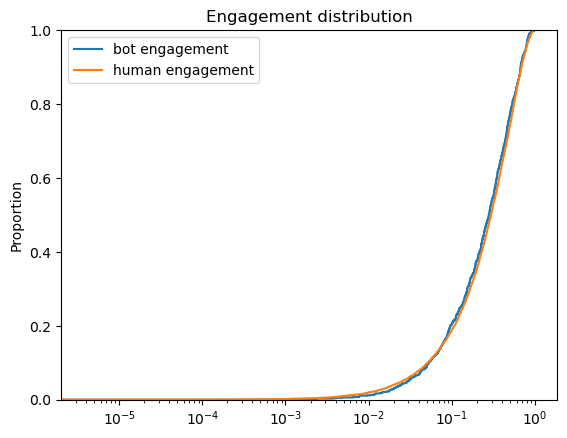

In [12]:
figure, ax = plt.subplots()
log_log=False
ax.set_xscale('log')
if log_log is True:
    ax.set_xscale('log')
    ax.set_yscale('log')
sns.ecdfplot(ax=ax, data = bot_e, complementary=False, label = 'bot engagement')
sns.ecdfplot(ax=ax, data = human_e, complementary=False, label = 'human engagement')
ax.legend()
ax.set_title("Engagement distribution")

## Phi=0.4

Text(0.5, 1.0, 'Engagement distribution (phi=0.4)')

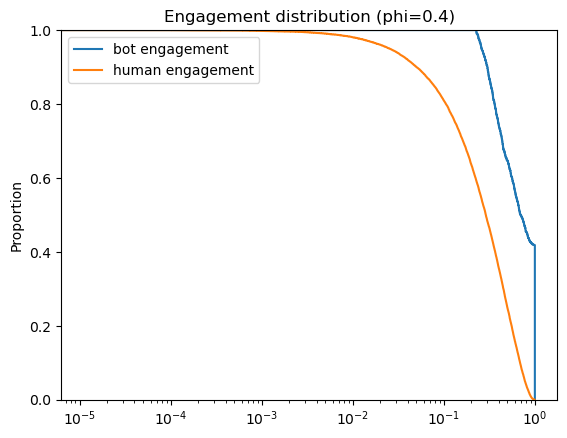

In [18]:
verbose = read_json_compressed(f'{RES_DIR}/40_3.json.gz')
phi = verbose['phi']
messages = pd.DataFrame.from_records(verbose["all_messages"])
# subset data
human_e = messages[messages.is_by_bot==0]['engagement'].values
bot_e = messages[messages.is_by_bot==1]['engagement'].values
# 
figure, ax = plt.subplots()
log_log=False
ax.set_xscale('log')
if log_log is True:
    ax.set_xscale('log')
    ax.set_yscale('log')
sns.ecdfplot(ax=ax, data = bot_e, complementary=True, label = 'bot engagement')
sns.ecdfplot(ax=ax, data = human_e, complementary=True, label = 'human engagement')
ax.legend()
ax.set_title(f"Engagement distribution (phi={phi})")


## Phi=1

Text(0.5, 1.0, 'Engagement distribution (phi=1.0)')

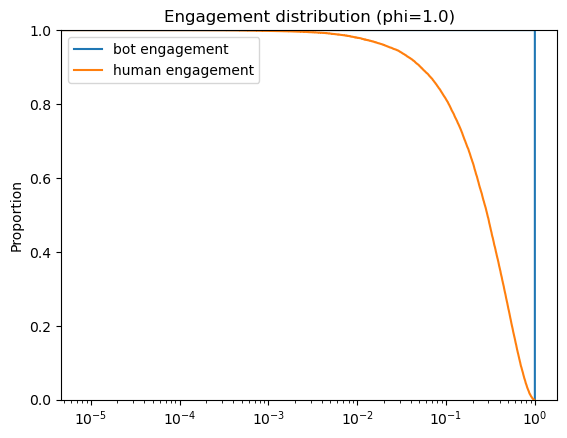

In [19]:
verbose = read_json_compressed(f'{RES_DIR}/100_3.json.gz')
phi = verbose['phi']
messages = pd.DataFrame.from_records(verbose["all_messages"])
# subset data
human_e = messages[messages.is_by_bot==0]['engagement'].values
bot_e = messages[messages.is_by_bot==1]['engagement'].values
# 
figure, ax = plt.subplots()
log_log=False
ax.set_xscale('log')
if log_log is True:
    ax.set_xscale('log')
    ax.set_yscale('log')
sns.ecdfplot(ax=ax, data = bot_e, complementary=True, label = 'bot engagement')
sns.ecdfplot(ax=ax, data = human_e, complementary=True, label = 'human engagement')
ax.legend()
ax.set_title(f"Engagement distribution (phi={phi})")


## Baseline

In [28]:
RES_DIR = os.path.join(ABS_DIR, "results_verbose", "baseline_5runs")
fpaths = glob.glob(f"{RES_DIR}/baseline*.json.gz")

phi=None
human_e = []
bot_e=[]
for idx,fpath in enumerate(fpaths):
    verbose = read_json_compressed(fpath)
    if idx==0:
        phi = verbose['phi']
    if len(verbose["all_messages"])>0:
        messages = pd.DataFrame.from_records(verbose["all_messages"])
        # subset data
        human_e += list(messages[messages.is_by_bot==0]['engagement'].values)
        bot_e += list(messages[messages.is_by_bot==1]['engagement'].values)
        print(f"no message humans: {len(human_e)}")
        print(f"no message bots: {len(bot_e)}")
    else:
        print(f"skip empty frame {fpath}")


no message humans: 20810
no message bots: 0
no message humans: 41070
no message bots: 0
no message humans: 61852
no message bots: 0
no message humans: 82047
no message bots: 0
no message humans: 102897
no message bots: 0


In [27]:
bot_e

[]

KeyError: 'pop from an empty set'

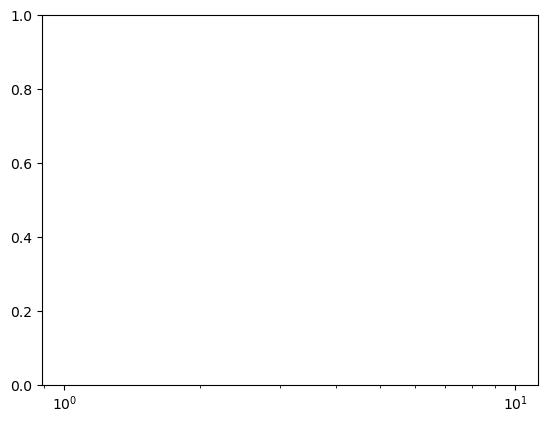

In [24]:
# 
figure, ax = plt.subplots()
log_log=False
ax.set_xscale('log')
if log_log is True:
    ax.set_xscale('log')
    ax.set_yscale('log')
sns.ecdfplot(ax=ax, data = bot_e, complementary=True, label = 'bot engagement')
sns.ecdfplot(ax=ax, data = human_e, complementary=True, label = 'human engagement')
ax.legend()
ax.set_title(f"Engagement distribution (phi={phi})")